# Part II - (effects of bike riders on trip duration)
## by (Youssef Al-lehyani)

## Investigation Overview


In this investigation, I wanted to look at the data of the members characteristics and how this affects the duration of the trip. The main focus was on the five things duration_sec,member_gender,member_birth_year,user_type and 	bike_share_for_all_trip.


## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. it has regarding (18,3412), including
duration_sec, member_gender, and other trip information..

In [12]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [13]:
# load in the dataset into a pandas dataframe
bike_rides  = pd.read_csv('201902-fordgobike-tripdata.csv')

In [14]:
#drop null value 
bike_rides.dropna(inplace = True)

#reset the index after drop 
bike_rides.reset_index(drop=True, inplace=True)

#retype the some of columns 
bike_rides["user_type"]=bike_rides["user_type"].astype('category');
bike_rides["member_gender"]=bike_rides["member_gender"].astype('category');
bike_rides["bike_share_for_all_trip"]=bike_rides["bike_share_for_all_trip"].astype('category');
bike_rides["member_birth_year"]=bike_rides["member_birth_year"].astype('int64');


#change the year
bike_rides.loc[bike_rides['member_birth_year']==1878,'member_birth_year']=1978

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Duration seconds
Duration seconds has a long-tailed distribution, with a lot of members finishing the race in record time and some of them needing a long time to finish the race, when we plotted on a log scale, the Duration looked like an as normal distribution

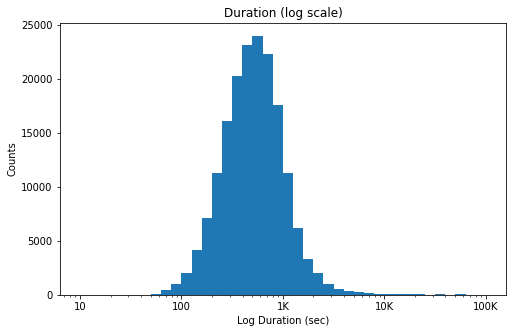

In [15]:
#because there's a long tail in the distribution,so put it on a log scale instead
log_binsize = 0.1
bins = 10 ** np.arange(1, np.log10(bike_rides['duration_sec'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = bike_rides, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([10,100, 1000, 10000, 100000],[10,100,'1K','10K','100K'])
plt.title( 'Duration (log scale)')
plt.xlabel('Log Duration (sec)')
plt.ylabel('Counts');
plt.show()

## The gender of members 


Almost male make up three quarters of the members with a percentage of about (74.6%) while women make up about (23.3%) while the rest are about (2.1%)

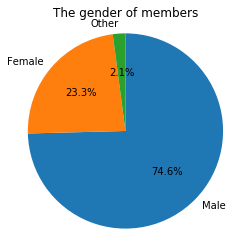

In [16]:
# pieplot of member_gender
member_gender_counts = bike_rides['member_gender'].value_counts()
plt.pie(member_gender_counts, labels = member_gender_counts.index, startangle = 90,autopct='%1.1f%%', counterclock = False);
plt.axis('square');
plt.title('The gender of members');

## duration seconds vs member birth year

we have more then 8000 members fished the trip in the 500 seconds and they were born between 1980 and 2000.also, there were some members were needing more than 1000 seconds to finish the trip but The strange thing was they were born between 1980 and 2000 too.

In [17]:
#remove outliers 
bike_outliers = bike_rides[bike_rides['duration_sec']<3000]
bike_outliers.reset_index(drop=True, inplace=True)

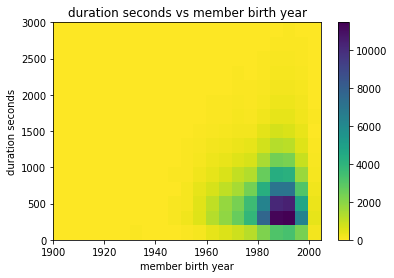

In [18]:
# hist2d  plot duration_sec vs member_gender
birth_bins_x = np.arange(1900, bike_outliers.member_birth_year.max()+5, 5)
birth_bins_y = np.arange(0, bike_outliers.duration_sec.max()+200, 200)
plt.hist2d(data=bike_outliers, x='member_birth_year', y='duration_sec', bins=[birth_bins_x, birth_bins_y], 
           cmap = 'viridis_r')
plt.colorbar()
plt.title('duration seconds vs member birth year');
plt.xlabel('member birth year')
plt.ylabel('duration seconds');

## duration seconds vs member birth year for (every gender)

because the most of members are male for that male has a greater prevalence than females and most of the females were need about 250 to 600 seconds to finish the trip less than male members who need under 500 seconds. also, we have some male members who need more than 2250 seconds to finish the trip but no female members that need more than 2250 seconds to finish the trip.
in the last all the female and male members were born between 1990 and 2000

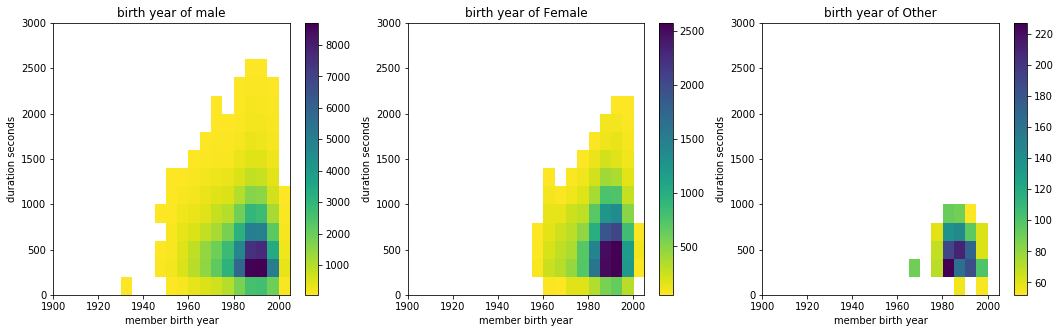

In [19]:
bike_outliers_male = bike_outliers[bike_outliers['member_gender']=='Male']
bike_outliers_female = bike_outliers[bike_outliers['member_gender']=='Female']
bike_outliers_other = bike_outliers[bike_outliers['member_gender']=='Other']

plt.figure(figsize = [18,5])

plt.subplot(1,3, 1)
plt.hist2d(data=bike_outliers_male, x='member_birth_year', y='duration_sec', bins=[birth_bins_x, birth_bins_y], 
           cmap = 'viridis_r', cmin=50)
plt.colorbar()
plt.title('birth year of male');
plt.xlabel('member birth year')
plt.ylabel('duration seconds');


plt.subplot(1, 3, 2)
plt.hist2d(data=bike_outliers_female, x='member_birth_year', y='duration_sec', bins=[birth_bins_x, birth_bins_y], 
           cmap = 'viridis_r', cmin=50);
plt.colorbar()
plt.title('birth year of Female');
plt.xlabel('member birth year')
plt.ylabel('duration seconds');


plt.subplot(1, 3, 3)
plt.hist2d(data=bike_outliers_other, x='member_birth_year', y='duration_sec', bins=[birth_bins_x, birth_bins_y], 
           cmap = 'viridis_r', cmin=50);
plt.colorbar()
plt.title('birth year of Other');
plt.xlabel('member birth year')
plt.ylabel('duration seconds');

## duration seconds vs User type (Filter by gender)

here we take the simple and show User type and duration trip filter by gender. but,
the unexpected thing is the Female Customer members finished the trip faster than the male Customer members.

In [20]:
bike_samples = bike_outliers.sample(n=500, replace = False)

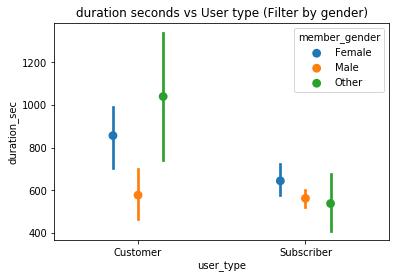

In [21]:
ax = sb.pointplot(data = bike_samples, x = 'user_type', y = 'duration_sec', hue = 'member_gender',
                  dodge = 0.3, linestyles = "")
plt.title('duration seconds vs User type (Filter by gender)');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 371635 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 